In [1]:
#John David Conley
#Deep Learning ICP 8
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


1. Tune hyperparameter and make necessary addition to the baseline model to improve validation accuracy 
and reduce validation loss. 
2. Provide logical description of which steps lead to improved response and what was its impact on 
architecture behavior.
3. Create at least two more visualizations using matplotlib (Other than provided in the source file)
4. Use dataset of your own choice and implement baseline models provided.
5. Apply modified architecture to your own selected dataset and train it.
6. Evaluate your model on testing set.
7. Save the improved model and use it for prediction on testing data
8. Provide plot of confusion matric
9. Provide Training and testing Loss and accuracy plots in one plot using subplot command and history object.
10. Provide at least two more visualizations reflecting your solution. 
11. Provide logical description of which steps lead to improved response for new dataset when compared with 
baseline model and enhance architecture and what was its impact on architecture behavior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop, Adam, SGD
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
#DEFAULT
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = y_train.reshape(-1,)
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [ ]:
#STILL DEFAULT
from keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
print(lenet.summary())
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 480)              

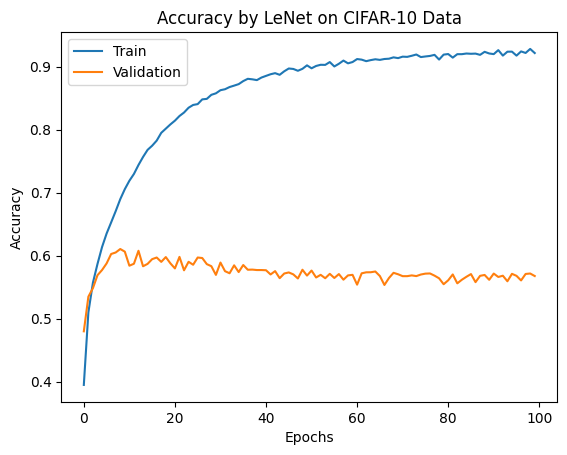

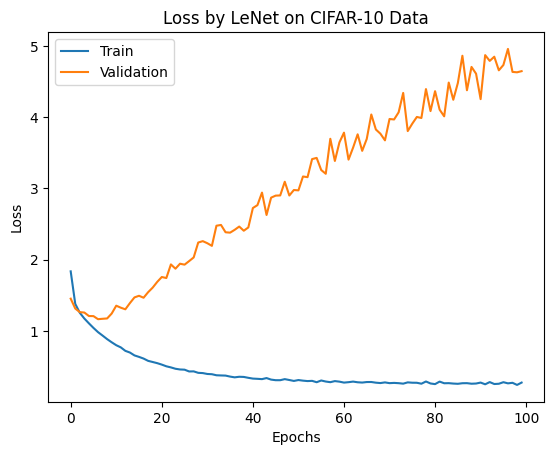

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[627,  29,  63,  37,  44,  12,   8,  15,  97,  68],
       [ 29, 739,  14,  21,  11,   7,  14,  10,  38, 117],
       [ 74,  15, 429, 110, 114,  80,  70,  66,  19,  23],
       [ 36,  27,  94, 344,  87, 206,  66,  70,  25,  45],
       [ 31,  12,  85,  87, 479,  70,  73, 123,  21,  19],
       [ 20,   5,  92, 195,  77, 438,  45,  85,  14,  29],
       [ 19,  26,  56,  92,  68,  51, 631,  19,  12,  26],
       [ 24,   5,  29,  49,  72,  85,  14, 667,  11,  44],
       [131,  59,  20,  18,  12,  14,   5,   9, 679,  53],
       [ 58, 165,  15,  24,  11,   4,  18,  22,  41, 642]])

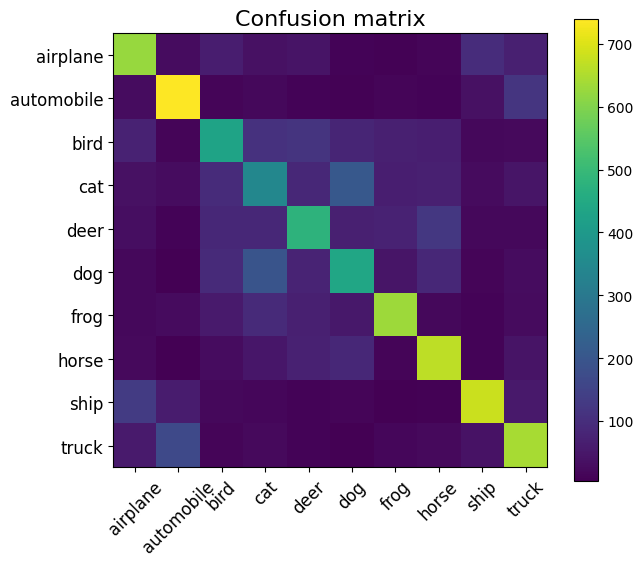

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5675


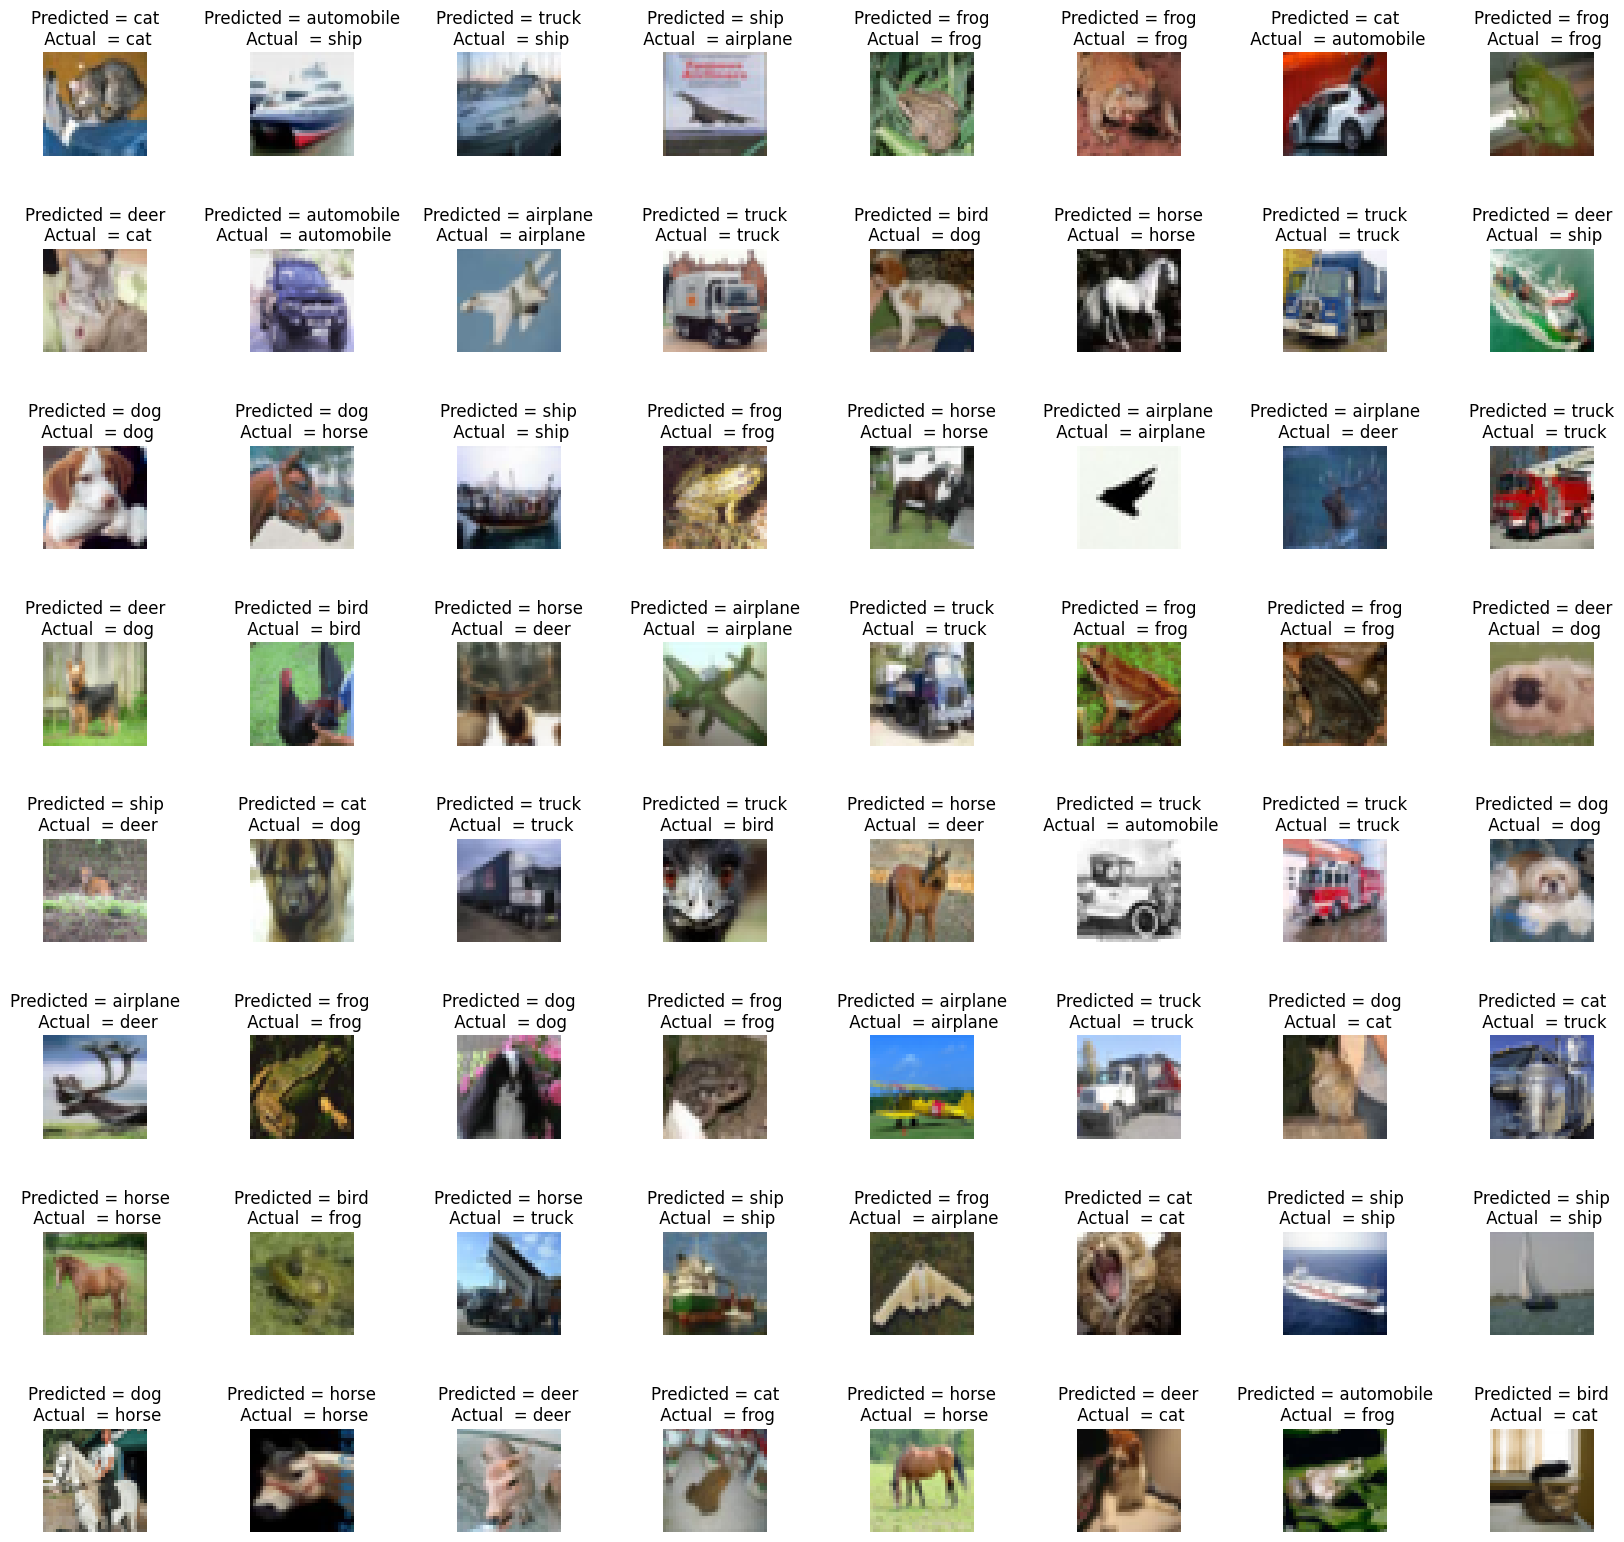

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D,  MaxPooling2D

In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print(AlexNet.summary())
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 2, 30)         

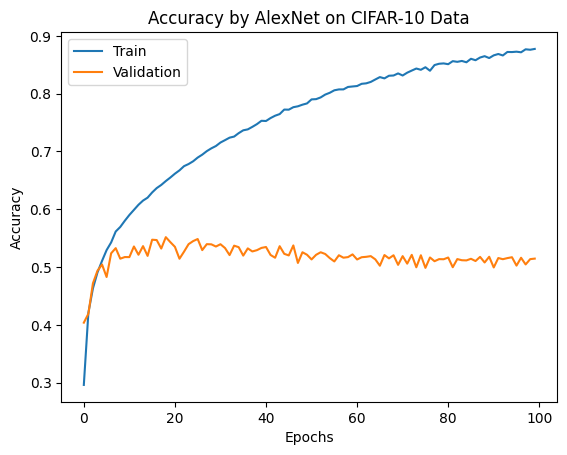

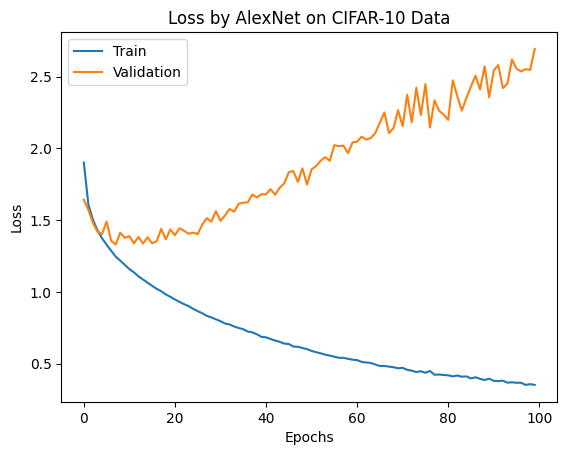

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[598,  35,  81,  38,  41,  13,  18,  14, 130,  32],
       [ 53, 638,  15,  31,   4,  14,  11,  23,  82, 129],
       [ 77,  12, 433, 100, 117,  93,  75,  50,  24,  19],
       [ 22,  25,  98, 385,  94, 192,  69,  64,  19,  32],
       [ 37,  12, 142,  86, 431,  88,  70,  99,  28,   7],
       [ 19,  13,  85, 275,  90, 376,  47,  72,  12,  11],
       [  9,  28,  69, 144,  95,  60, 543,  22,  15,  15],
       [ 36,   9,  63,  75, 107,  89,  18, 535,  27,  41],
       [102,  53,  24,  29,  32,  10,   9,   8, 687,  46],
       [ 58, 190,  24,  47,  14,  17,  24,  31,  74, 521]])

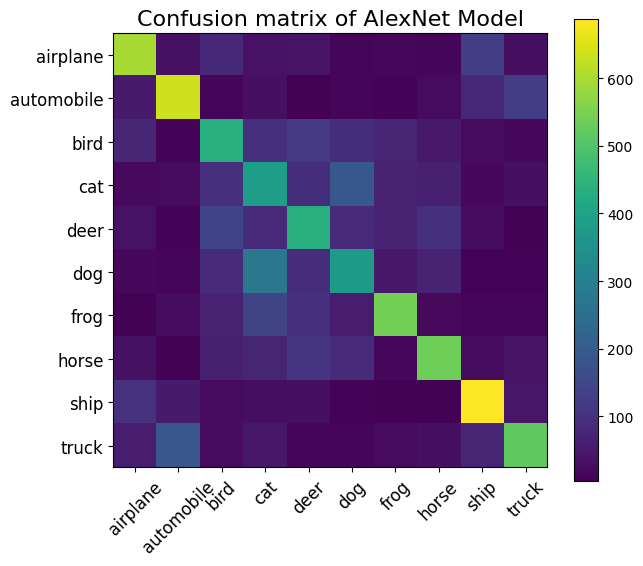

In [ ]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

Test accuracy by AlexNet: 0.5675


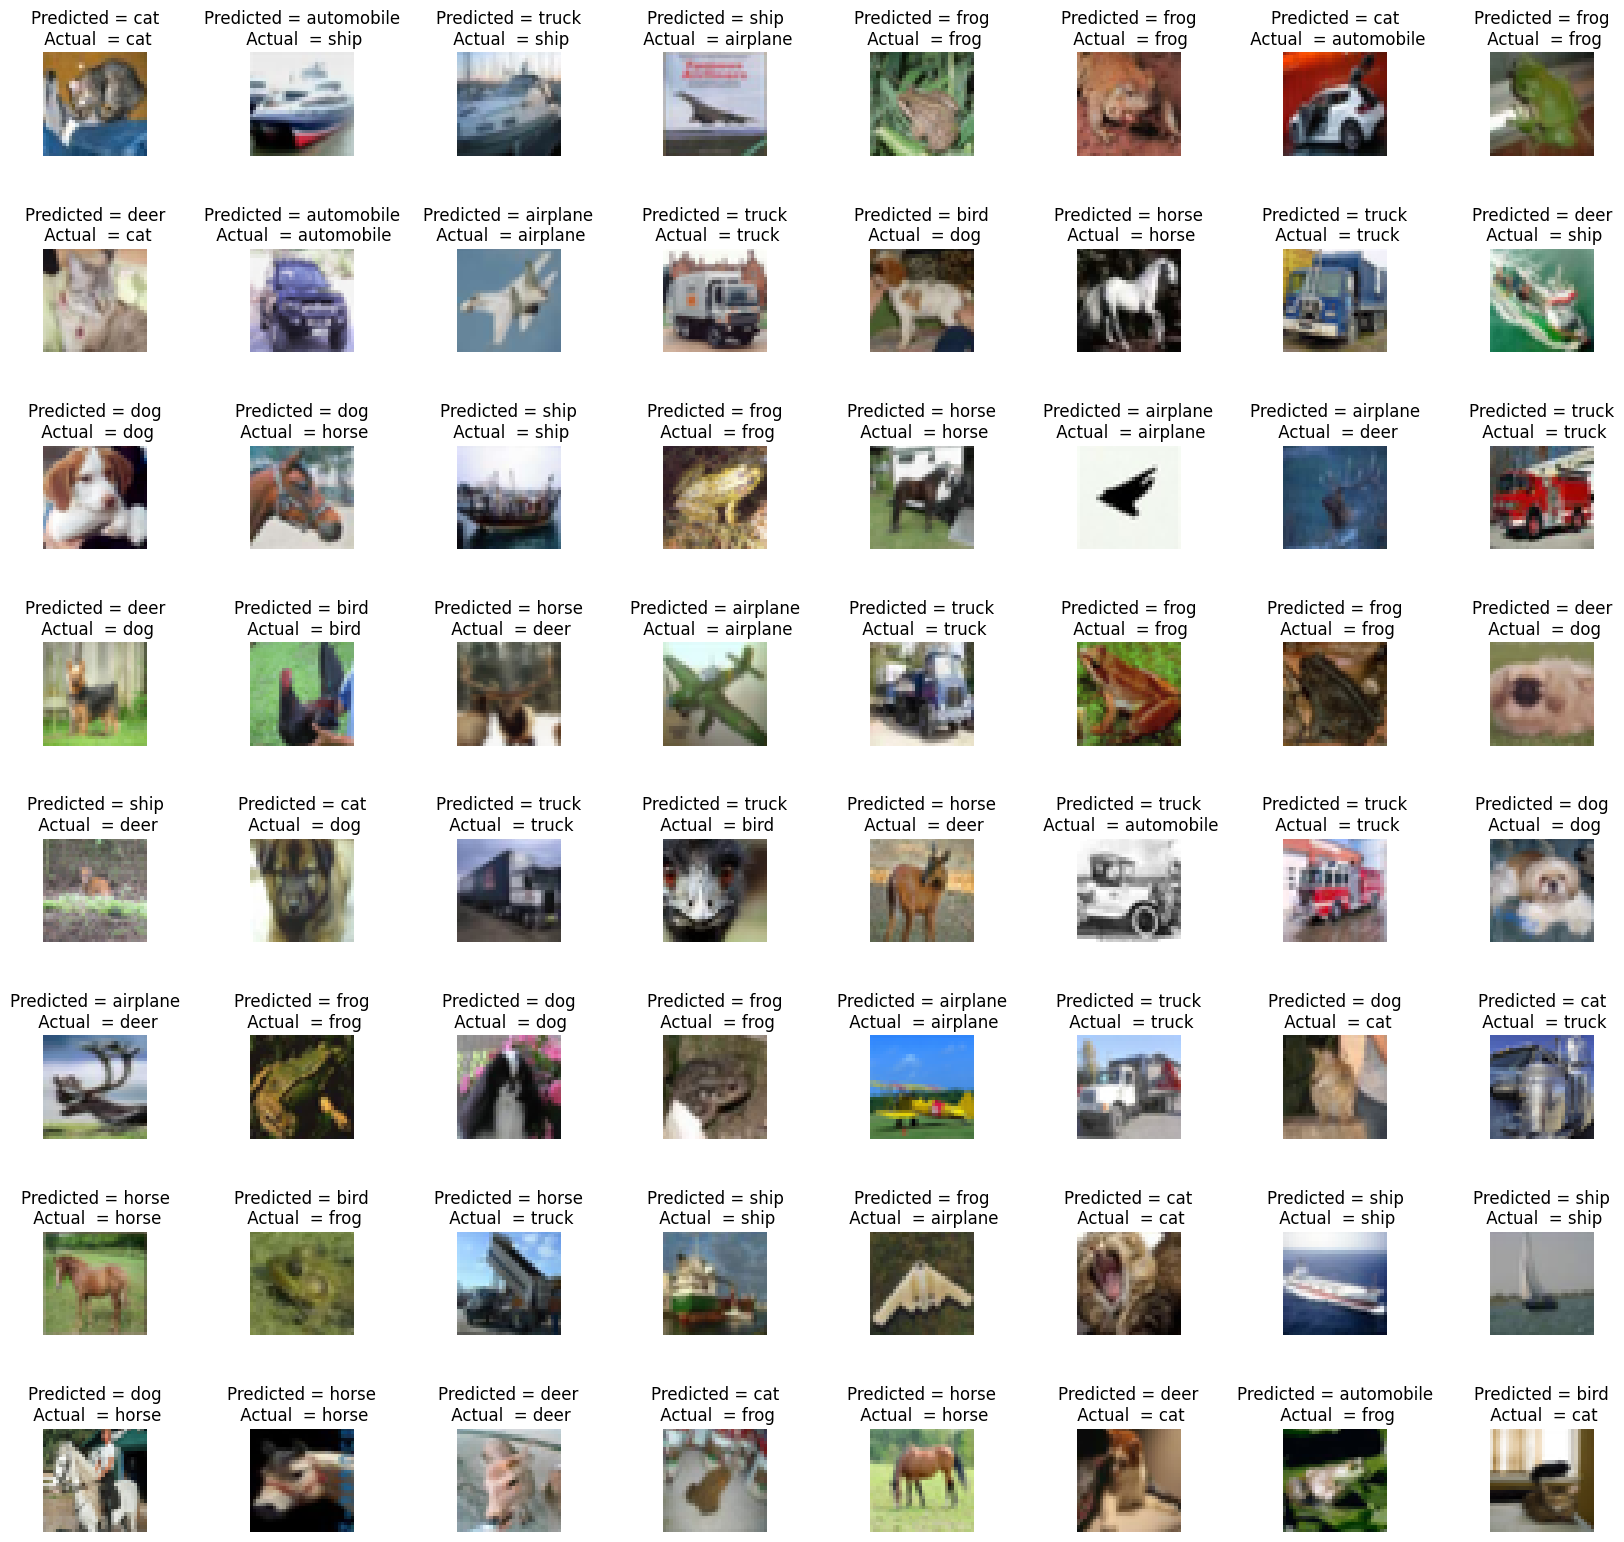

In [ ]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# **NEW CODE STARTS HERE**

In [4]:
from keras.models import Sequential
from keras import layers, models
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D,  MaxPooling2D,  AveragePooling2D
#1,2
lenet2 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    #keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', padding='same'), ##Added variant layer
    #keras.layers.Dropout(0.2), ##Added dropout layer
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    #keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='same'), ##Added variant layer
    #keras.layers.Dropout(0.2), ##Added dropout layer

    keras.layers.Conv2D(16, (3,3), activation='relu', padding='valid'), ##Added variant layer, this helped with the val_accuracy
    keras.layers.MaxPooling2D(), ##Added variant layer
    keras.layers.Conv2D(84, (1,1), activation='relu', padding='valid'), ##Added 84 layer, this helped with the val_accuracy
    keras.layers.AveragePooling2D(), ##Added 84 layer
    keras.layers.Conv2D(84, (1,1), activation='relu', padding='valid'), ##Added 84 layer, this helped with the val_accuracy
    keras.layers.Dropout(0.2), ##Added 84 layer

    #keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    #keras.layers.Dense(120, activation='relu'), ##Added flatten layer
    #keras.layers.Dropout(0.2), ##Added dropout layer 
    keras.layers.Dense(84, activation='relu'), #F1
    #keras.layers.Dropout(0.2), ##Added dropout layer
    #keras.layers.Dense(16, activation='relu'), ##Added flatten layer
    #keras.layers.Dropout(0.2), ##Added dropout layer
    #keras.layers.Dense(6, activation='relu'), ##Added flatten layer
    #keras.layers.Dropout(0.2), ##Added dropout layer
    keras.layers.Dense(10, activation='softmax') #Output layer
])


print(lenet2.summary())
lenet2.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
hist = lenet2.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 16)         0

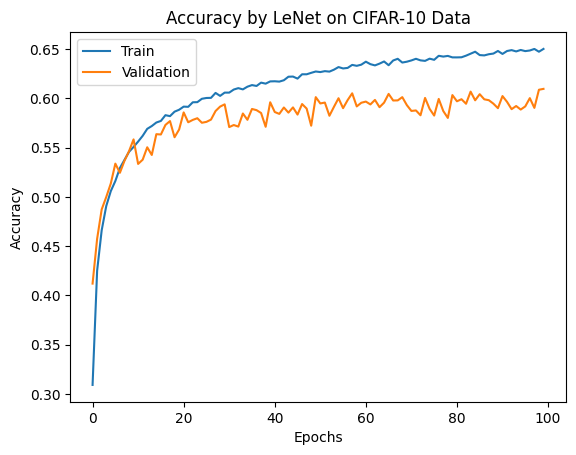

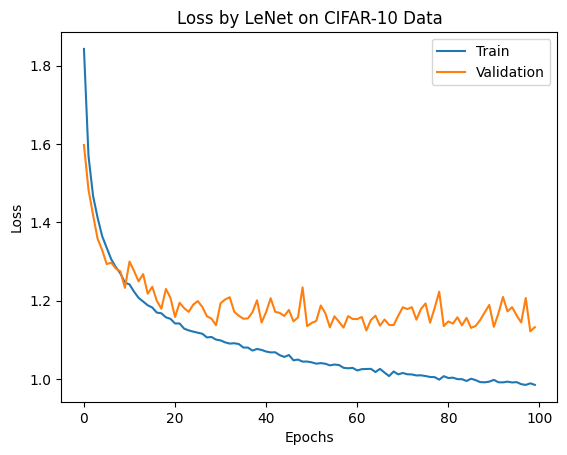

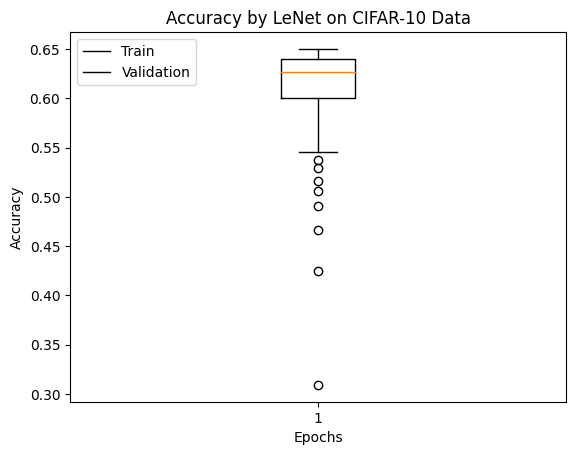

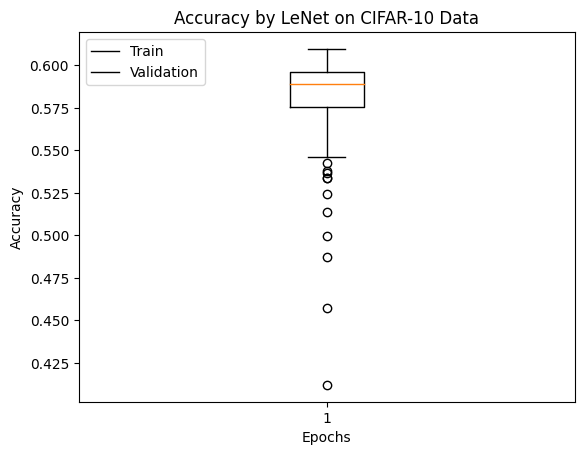

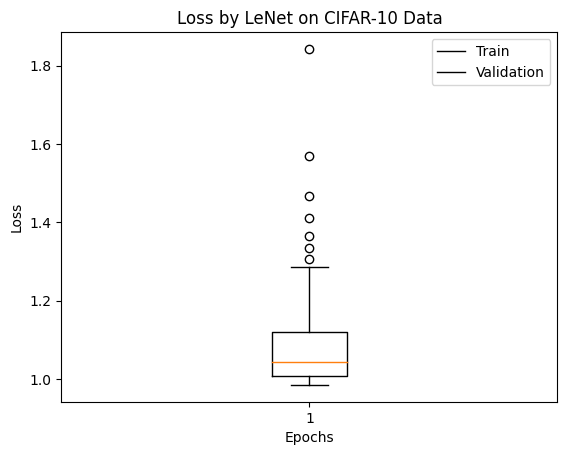

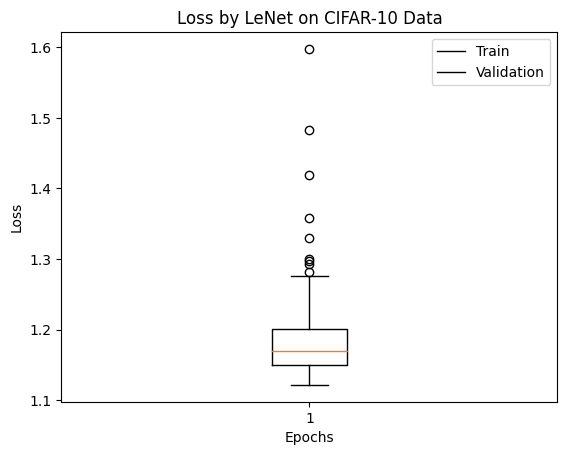

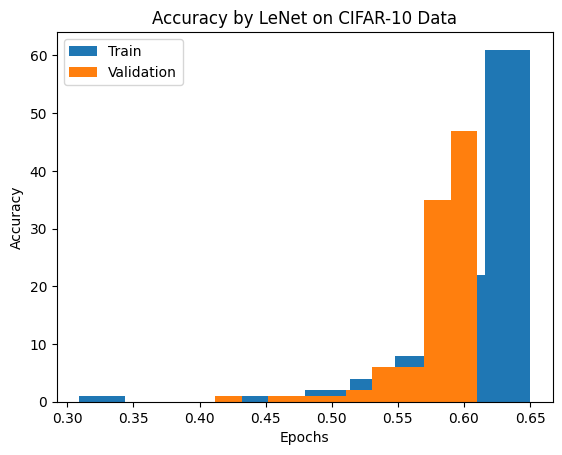

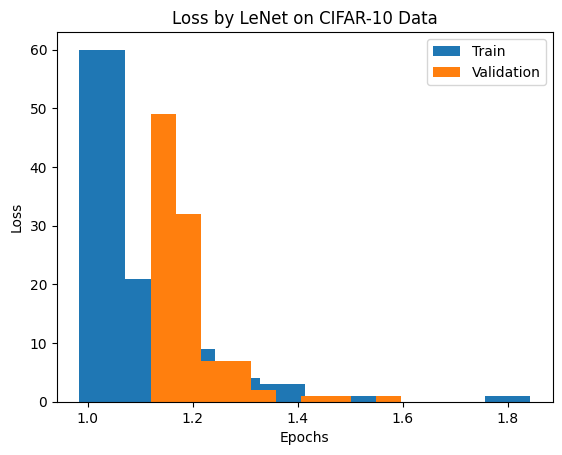

In [15]:
#3
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
# summarize history for accuracy
plt.boxplot(hist.history['accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.boxplot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.boxplot(hist.history['loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
plt.boxplot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
# summarize history for accuracy
plt.hist(hist.history['accuracy'])
plt.hist(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.hist(hist.history['loss'])
plt.hist(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [78]:
#4
(x_train2, y_train2), (x_test2, y_test2)  = keras.datasets.fashion_mnist.load_data()

In [81]:
#from tensorflow import convert_to_tensor, float32
#x_train2 = convert_to_tensor(x_train2, dtype=float32)
#y_train2 = convert_to_tensor(y_train2, dtype=float32)
#x_test2 = convert_to_tensor(x_test2, dtype=float32)
#y_test2 = convert_to_tensor(y_test2, dtype=float32)

#x_train2=np.asarray(x_train2).astype(np.int)

#y_train2=np.asarray(y_train2).astype(np.int)

y_train2 = y_train2.reshape(-1,)
# Reshape converting 2D to 1D
y_test2 = y_test2.reshape(-1,)
y_train2 = y_train2.reshape(-1,)
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)
from keras import layers, models
lenet3 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(28, 28, 1), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])
print(lenet3.summary())
lenet3.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
hist = lenet3.fit(x_train2, y_train2, epochs=100, validation_data=(x_test2, y_test2),verbose=1)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_71 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_110 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_72 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_111 (Conv2D)         (None, 1, 1, 120)         48120     
                                                                 
 fl

In [88]:
#5
lenet4 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(28, 28, 1), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, (3,3), activation='relu', padding='valid'), ##Added variant layer, this helped with the val_accuracy
    keras.layers.MaxPooling2D(), ##Added variant layer
    keras.layers.Conv2D(84, (1,1), activation='relu', padding='valid'), ##Added 84 layer, this helped with the val_accuracy
    keras.layers.Dropout(0.2), ##Added 84 layer
    keras.layers.Conv2D(84, (1,1), activation='relu', padding='valid'), ##Added 84 layer, this helped with the val_accuracy
    keras.layers.Dropout(0.2), ##Added 84 layer
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

print(lenet4.summary())
lenet4.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
hist = lenet4.fit(x_train2, y_train2, epochs=100, validation_data=(x_test2, y_test2),verbose=1)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_84 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_143 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_85 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_144 (Conv2D)         (None, 3, 3, 16)          2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 1, 1, 16)       

In [90]:
#6
lenet4.evaluate(x_test2, y_test2, verbose=0)

[0.35565418004989624, 0.8828999996185303]

In [92]:
#7
lenet4.predict(x_test2)

313/313 [==============================] - 1s 3ms/step


array([[3.91039015e-35, 6.31534135e-25, 4.35799383e-37, ...,
        1.09422435e-04, 4.13932331e-22, 9.99889255e-01],
       [1.77097827e-04, 2.23046186e-06, 9.98541951e-01, ...,
        1.41309906e-11, 1.66556518e-07, 5.26728172e-07],
       [4.16514014e-23, 1.00000000e+00, 1.77742474e-21, ...,
        0.00000000e+00, 1.84185179e-37, 0.00000000e+00],
       ...,
       [1.79057179e-06, 3.97654780e-08, 4.74343828e-11, ...,
        1.95782748e-13, 9.99997497e-01, 2.12229204e-14],
       [2.61254743e-14, 1.00000000e+00, 1.23254692e-13, ...,
        0.00000000e+00, 6.04122707e-22, 1.09224972e-34],
       [4.72648826e-05, 8.46494146e-08, 7.79821767e-06, ...,
        3.03218365e-01, 3.57559021e-03, 3.15337884e-03]], dtype=float32)

In [94]:
#8
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions2= lenet4.predict(x_test2)
y_predictions2.reshape(-1,)
y_predictions2= np.argmax(y_predictions2, axis=1)

confusion_matrix(y_test2, y_predictions2)

313/313 [==============================] - 1s 2ms/step


array([[846,   1,  15,  25,   3,   1, 101,   0,   8,   0],
       [  2, 967,   1,  20,   4,   0,   3,   0,   3,   0],
       [ 22,   0, 814,  12,  75,   0,  74,   0,   3,   0],
       [ 19,   1,  12, 891,  46,   0,  30,   0,   1,   0],
       [  1,   1,  76,  33, 842,   0,  46,   0,   1,   0],
       [  0,   0,   1,   0,   0, 962,   0,  25,   0,  12],
       [143,   1,  88,  41,  99,   1, 617,   0,  10,   0],
       [  0,   0,   0,   0,   0,   9,   0, 972,   2,  17],
       [  3,   0,   1,   2,   8,   2,   8,   2, 974,   0],
       [  1,   1,   0,   0,   0,   6,   0,  48,   0, 944]])

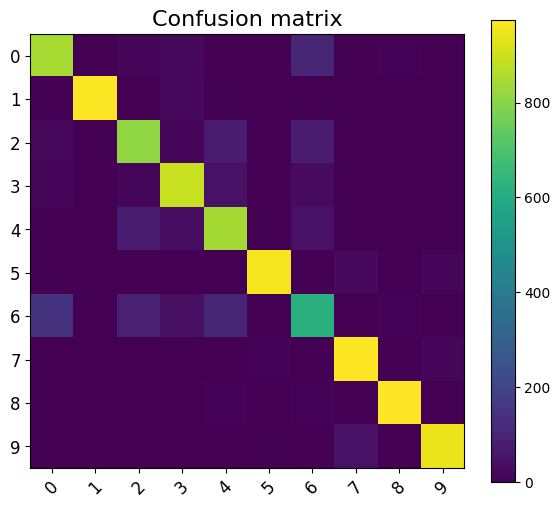

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test2, y_predictions2))
plt.xticks(np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

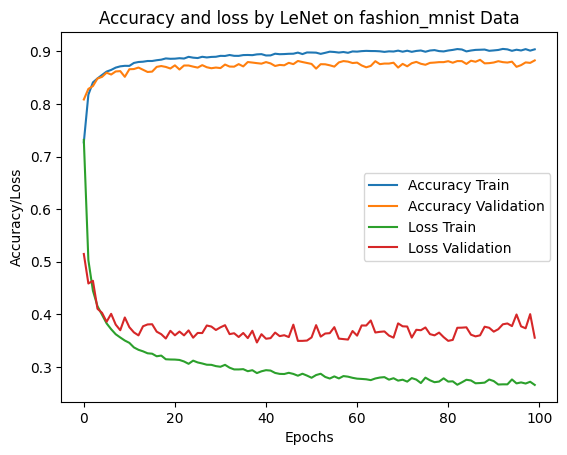

In [105]:
#9
# summarize history for accuracy
plt.subplot(111)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Accuracy and loss by LeNet on fashion_mnist Data")
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['Accuracy Train', 'Accuracy Validation', 'Loss Train', 'Loss Validation'])
# summarize history for loss
#plt.title('Loss by LeNet on fashion_mnist Data')
#plt.ylabel('Loss')
#plt.xlabel('Epochs')
#plt.legend(['Train', 'Validation'])
plt.show()

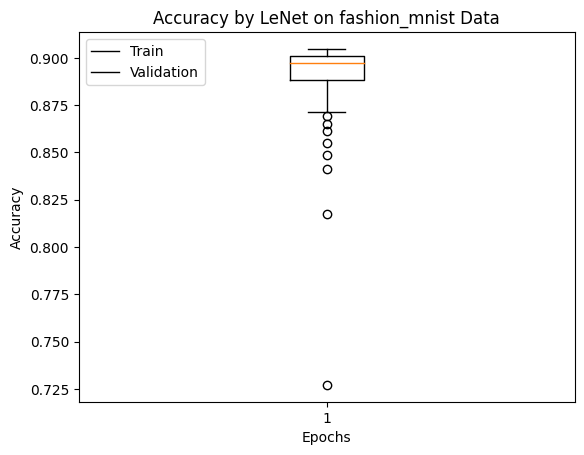

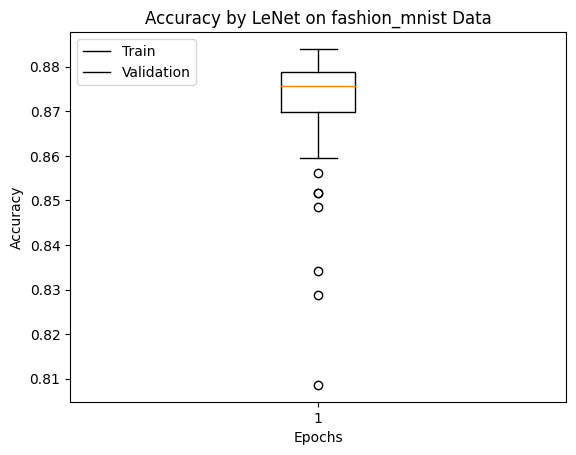

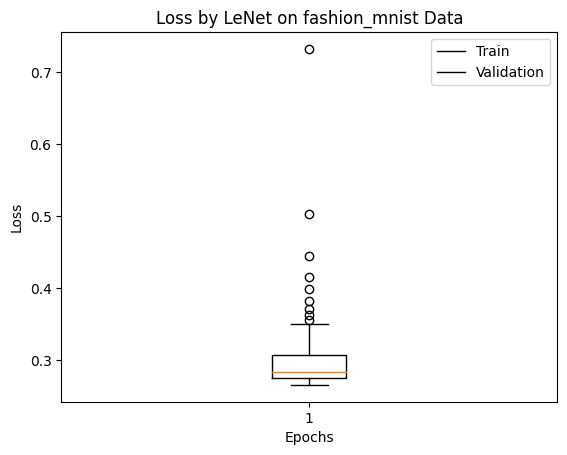

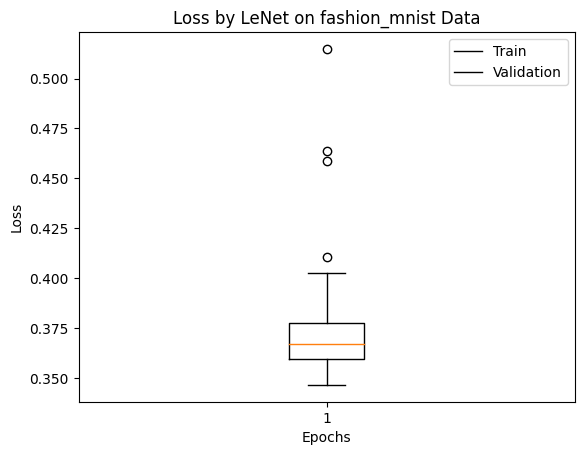

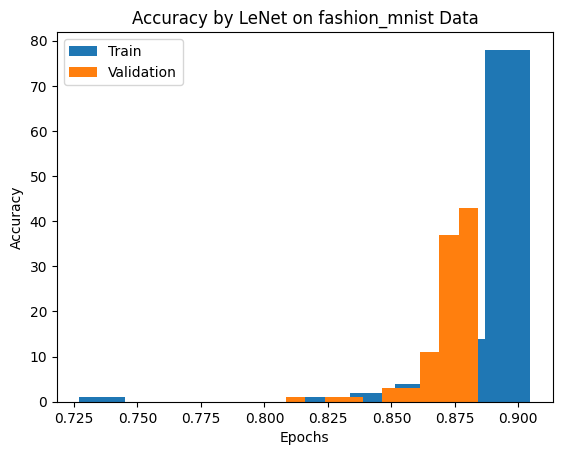

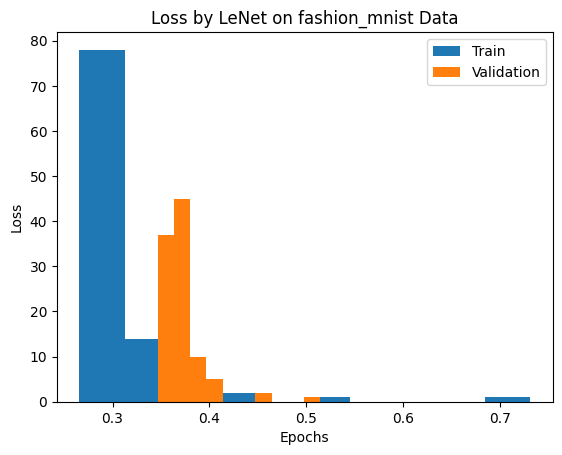

In [106]:
#10
# summarize history for accuracy
plt.boxplot(hist.history['accuracy'])
plt.title("Accuracy by LeNet on fashion_mnist Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.boxplot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on fashion_mnist Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.boxplot(hist.history['loss'])
plt.title('Loss by LeNet on fashion_mnist Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
plt.boxplot(hist.history['val_loss'])
plt.title('Loss by LeNet on fashion_mnist Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
# summarize history for accuracy
plt.hist(hist.history['accuracy'])
plt.hist(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on fashion_mnist Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.hist(hist.history['loss'])
plt.hist(hist.history['val_loss'])
plt.title('Loss by LeNet on fashion_mnist Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [107]:
#11
print("Adding more convolution layers to the baseline network improved the accuracy by giving more iterations that sorted them properly, rather than muddling them more like more dense layers would.")

Adding more convolution layers to the baseline network improved the accuracy by giving more iterations that sorted them properly, rather than muddling them more like more dense layers would.
